In [156]:
#import needed libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk



In [157]:
#Load the data set

df = pd.read_csv('Data/Scaled_Imputed_income.csv')
print(df.shape)


(2240, 25)


In [158]:
#Datasplit of information

#make a spcialized test datset sampling of the classes

class_0_samples = df[df['Response'] == 0]
class_1_samples = df[df['Response'] == 1]

class_0_sampled = class_0_samples.sample(n=50,random_state=1)
class_1_sampled = class_1_samples.sample(n=50,random_state=1)

Test_data = pd.concat([class_0_sampled,class_1_sampled],axis=0)
Train_data = df.drop(Test_data.index)

#Shuffle the datasets
Test_data = Test_data.sample(frac=1,random_state=1)
Train_data = Train_data.sample(frac=1,random_state=1)

#making the input and target variables
Test_data_targ = Test_data['Response']
Test_data_input = Test_data.drop(columns=['Unnamed: 0','Id','Response','Education','Marital_Status','Dt_Customer']).astype(float)

Train_data_targ = Train_data['Response']
Train_data_input = Train_data.drop(columns=['Unnamed: 0','Id','Response','Education','Marital_Status','Dt_Customer']).astype(float)




In [159]:
#Part 2 model and hyperparamter training

#import needed models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

def calc_model_performance(true_labels, pred_labels):

    #Compute the scores
    acc = accuracy_score(true_labels,pred_labels)
    prec = precision_score(true_labels,pred_labels)
    recall = recall_score(true_labels,pred_labels)
    f1 = f1_score(true_labels,pred_labels)
    roc = roc_auc_score(true_labels,pred_labels)
    #Get the confusion matrix
    cm = confusion_matrix(true_labels,pred_labels)

    #Combine results into one return value
    performance_metrics = {
        'Accuracy': acc,
        'Precision': prec,
        'Recall': recall,
        'F1 Score': f1,
        'Roc_auc': roc,
        'ConfusionMatrix': cm
    }

    return performance_metrics


In [160]:

#KNN

param_grid = {'n_neighbors':[3,5,7,9,11]}

knn_class = KNeighborsClassifier()
gridsearch = GridSearchCV(knn_class,param_grid,cv=5,n_jobs=5)
#grid search for performance
gridsearch.fit(Train_data_input,Train_data_targ)
#store the best fit
best_params_knn = gridsearch.best_params_
print(f'Best Score: {gridsearch.best_score_}')
#make the method
KNN_CLASS = KNeighborsClassifier(**best_params_knn)
#Fit
KNN_CLASS.fit(Train_data_input,Train_data_targ)

#check the score
KNN_pred = KNN_CLASS.predict(Test_data_input)

#own scoring function to yield the acc, f1, and other features

KNN_metric = calc_model_performance(Test_data_targ,KNN_pred)

print(KNN_metric['Accuracy'])


Best Score: 0.869626168224299
0.52


In [161]:
#LDA

param_grid = {'solver':['svd','lsqr']}
LDA = LinearDiscriminantAnalysis()
gridsearch = GridSearchCV(LDA,param_grid,cv=5,n_jobs=5)
gridsearch.fit(Train_data_input,Train_data_targ)
best_params_LDA = gridsearch.best_params_
LDA_CLASS = LinearDiscriminantAnalysis(**best_params_LDA)

LDA_CLASS.fit(Train_data_input,Train_data_targ)

LDA_pred = LDA_CLASS.predict(Test_data_input)

LDA_metric = calc_model_performance(Test_data_targ,LDA_pred)
print(f'LDA Accuracry: {LDA_metric['Accuracy']}')


LDA Accuracry: 0.63


In [162]:
#QDA
#No hyperparameter tuning is required for this, will just run it as cv 5 to get the best metric
param_grid = {}
QDA = QuadraticDiscriminantAnalysis()
gridsearch = GridSearchCV(QDA,param_grid,cv=5,n_jobs=5)
gridsearch.fit(Train_data_input,Train_data_targ)
best_params_QDA = gridsearch.best_params_
QDA_CLASS = QuadraticDiscriminantAnalysis(**best_params_QDA)

QDA_CLASS.fit(Train_data_input,Train_data_targ)

QDA_pred = QDA_CLASS.predict(Test_data_input)

QDA_metric = calc_model_performance(Test_data_targ,QDA_pred)
print(f'QDA Accuracry: {QDA_metric['Accuracy']}')



QDA Accuracry: 0.72


In [163]:
#Logisitic Regression

param_grid = {'solver':['liblinear','newton-cg','sag','saga'],
              'max_iter':[200],
              'C': [0.001,0.01,0.1,1,10],
              'class_weight': [None,'balanced']
              }
LR = LogisticRegression()
gridsearch = GridSearchCV(LR,param_grid,cv=5,n_jobs=10)
gridsearch.fit(Train_data_input,Train_data_targ)
best_params_LR = gridsearch.best_params_
LR_CLASS = LogisticRegression(**best_params_LR)

LR_CLASS.fit(Train_data_input,Train_data_targ)

LR_pred = LR_CLASS.predict(Test_data_input)

LR_metric = calc_model_performance(Test_data_targ,LR_pred)
print(f'Logistic regression Accuracry: {LR_metric['Accuracy']}')



/home/eric/.local/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/eric/.local/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/eric/.local/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/eric/.local/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/eric/.local/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/eric/.local/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: Convergen

Logistic regression Accuracry: 0.53


In [164]:
#SVC

param_grid = {'kernel':['rbf','sigmoid'],
              'gamma':['scale','auto']
              }
Support = SVC()
gridsearch = GridSearchCV(Support,param_grid,cv=5,n_jobs=20)
gridsearch.fit(Train_data_input,Train_data_targ)
best_params_SVC = gridsearch.best_params_
SVC_CLASS = SVC(**best_params_SVC)

SVC_CLASS.fit(Train_data_input,Train_data_targ)

SVC_pred = SVC_CLASS.predict(Test_data_input)

SVC_metric = calc_model_performance(Test_data_targ,SVC_pred)
print(f'SVC Accuracry: {SVC_metric['Accuracy']}')


SVC Accuracry: 0.54


In [168]:
#Random forest
param_grid = {
    'n_estimators': [50,100,200],
    'max_depth': [None,5,10],
    'min_samples_leaf': [1,2,3],
}

rfclass = RandomForestClassifier()
gridsearch = GridSearchCV(rfclass,param_grid,cv=5,n_jobs=20)
gridsearch.fit(Train_data_input,Train_data_targ)
best_params_RF = gridsearch.best_params_
RFCLASS = RandomForestClassifier(**best_params_RF)

RFCLASS.fit(Train_data_input,Train_data_targ)

RF_pred = RFCLASS.predict(Test_data_input)

RF_metrics = calc_model_performance(Test_data_targ,RF_pred)
print(f'RF Accuracy: {RF_metrics['Accuracy']}')



RF Accuracy: 0.59


In [172]:
# XG boost 

param_grid = {
    'n_estimators': [10,50,100],
    'max_depth': [2,3,5],
    'gamma' : [0,.1,.2]
}

xgboost = xgb.XGBClassifier()

gridsearch = GridSearchCV(xgboost,param_grid,cv=5)
gridsearch.fit(Train_data_input,Train_data_targ)
best_params_XGboost = gridsearch.best_params_
XGCLASS = xgb.XGBClassifier(**best_params_XGboost)

XGCLASS.fit(Train_data_input,Train_data_targ)

XG_pred = XGCLASS.predict(Test_data_input)

XG_metrics = calc_model_performance(Test_data_targ,XG_pred)
print(f'XG boost Accuracy: {XG_metrics['Accuracy']}')



XG boost Accuracy: 0.69
{'Accuracy': 0.69, 'Precision': 0.9523809523809523, 'Recall': 0.4, 'F1 Score': 0.5633802816901409, 'Roc_auc': 0.69, 'ConfusionMatrix': array([[49,  1],
       [30, 20]])}


KNN performance: {'Accuracy': 0.52, 'Precision': 1.0, 'Recall': 0.04, 'F1 Score': 0.07692307692307693, 'Roc_auc': 0.52, 'ConfusionMatrix': array([[50,  0],
       [48,  2]])}
LDA performance: {'Accuracy': 0.63, 'Precision': 0.8421052631578947, 'Recall': 0.32, 'F1 Score': 0.463768115942029, 'Roc_auc': 0.63, 'ConfusionMatrix': array([[47,  3],
       [34, 16]])}
QDA performance: {'Accuracy': 0.72, 'Precision': 0.8235294117647058, 'Recall': 0.56, 'F1 Score': 0.6666666666666666, 'Roc_auc': 0.72, 'ConfusionMatrix': array([[44,  6],
       [22, 28]])}
LR performance: {'Accuracy': 0.53, 'Precision': 1.0, 'Recall': 0.06, 'F1 Score': 0.11320754716981132, 'Roc_auc': 0.53, 'ConfusionMatrix': array([[50,  0],
       [47,  3]])}
SVC performance: {'Accuracy': 0.54, 'Precision': 1.0, 'Recall': 0.08, 'F1 Score': 0.14814814814814814, 'Roc_auc': 0.54, 'ConfusionMatrix': array([[50,  0],
       [46,  4]])}
RF performance: {'Accuracy': 0.59, 'Precision': 0.8461538461538461, 'Recall': 0.22, 'F1 Score': 0.3

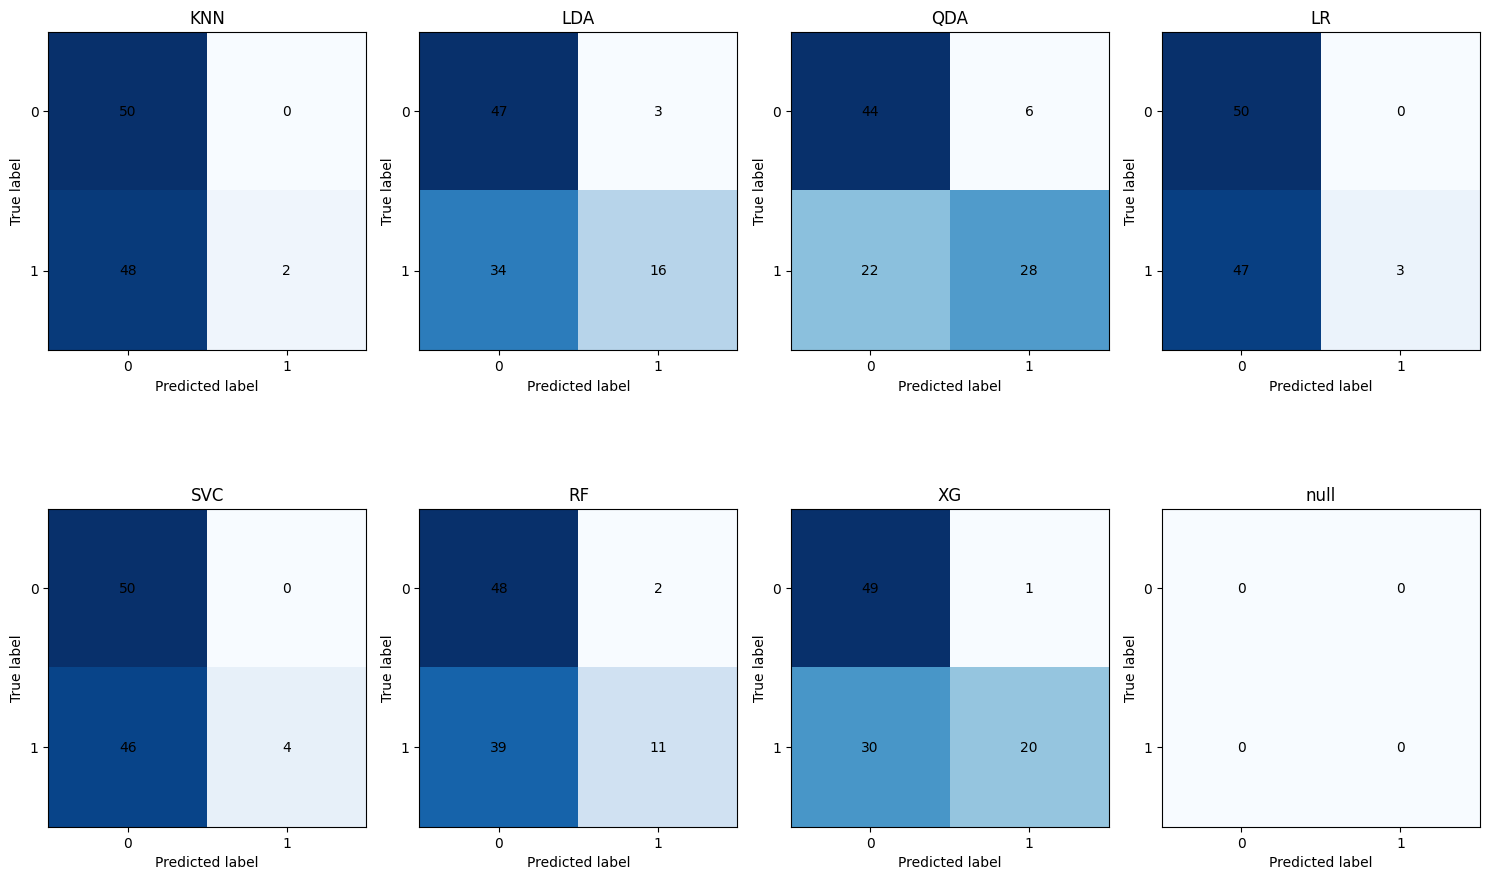

In [191]:
#Print all perfomrances

print(f'KNN performance: {KNN_metric}')
print(f'LDA performance: {LDA_metric}')
print(f'QDA performance: {QDA_metric}')
print(f'LR performance: {LR_metric}')
print(f'SVC performance: {SVC_metric}')
print(f'RF performance: {RF_metrics}')
print(f'XG performance: {XG_metrics}')

# Data for confusion matrices
confusion_matrices = [
    np.array([[50, 0], [48, 2]]),  # KNN
    np.array([[47, 3], [34, 16]]),  # LDA
    np.array([[44, 6], [22, 28]]),  # QDA
    np.array([[50, 0], [47, 3]]),   # LR
    np.array([[50, 0], [46, 4]]),   # SVC
    np.array([[48, 2], [39, 11]]),  # RF
    np.array([[49, 1], [30, 20]]),  # XG
    np.array([[0,0],[0,0]]),        # Null
]

model_names = ['KNN', 'LDA', 'QDA', 'LR', 'SVC', 'RF', 'XG', 'null']

# Plot confusion matrices
fig, axs = plt.subplots(2, 4, figsize=(15, 10))

for i, (matrix, name) in enumerate(zip(confusion_matrices, model_names)):
    ax = axs[i // 4, i % 4]
    ax.imshow(matrix, cmap='Blues')
    ax.set_title(name)
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')
    ax.set_yticks([0, 1])
    ax.set_xticks([0, 1])
    for j in range(matrix.shape[0]):
        for k in range(matrix.shape[1]):
            ax.text(k, j, str(matrix[j, k]), ha='center', va='center', color='black')

plt.tight_layout()
plt.savefig('Figures/ConfusionMatrix.png',dpi=200)
plt.show()


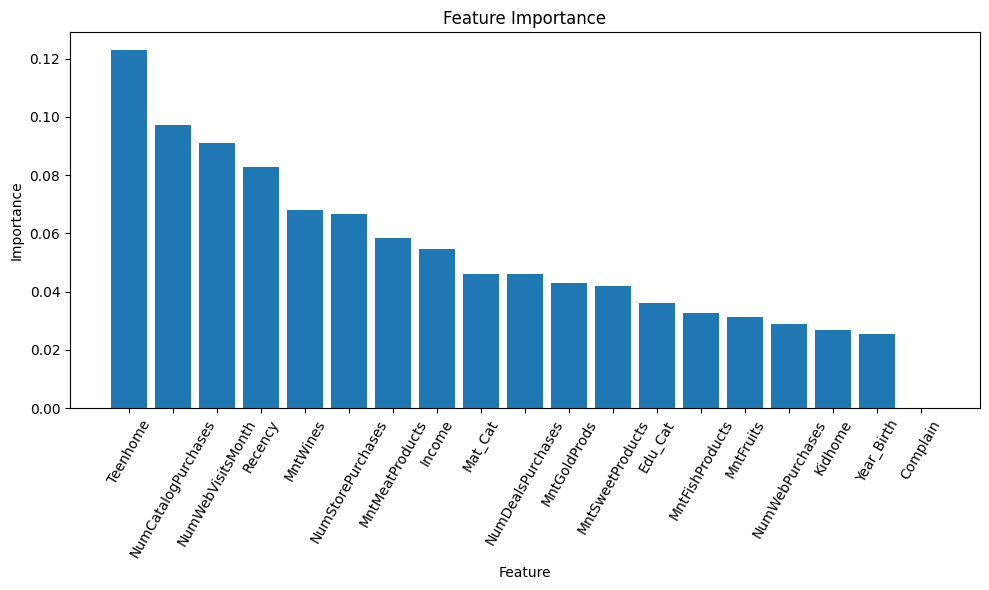

In [197]:
#Getting the variable importance from XGboost

# Get feature importance
feature_importance = XGCLASS.feature_importances_

# Get feature names
feature_names = Train_data_input.columns

# Sort features by importance
sorted_indices = feature_importance.argsort()[::-1]
sorted_importance = feature_importance[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), sorted_importance, align='center')
plt.xticks(range(len(feature_importance)), sorted_feature_names, rotation=60)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.savefig('Figures/FeatureImportance.png',dpi=200)
plt.show()